In [3]:
!pip install -r /content/RAG/Test_RAG_ChatBot/requirments.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [1]:

import sys


sys.path.append("./src")
#sys.path.append("/content/RAG/Test_RAG_ChatBot/")

import config
from src import create_data_chunks , execute_rag , extract_data

import warnings
warnings.filterwarnings("ignore")

!playwright install

Playwright Host validation warning: 
╔══════════════════════════════════════════════════════╗
║ Host system is missing dependencies to run browsers. ║
║ Missing libraries:                                   ║
║     libwoff2dec.so.1.0.2                             ║
║     libgstgl-1.0.so.0                                ║
║     libgstcodecparsers-1.0.so.0                      ║
║     libharfbuzz-icu.so.0                             ║
║     libenchant-2.so.2                                ║
║     libsecret-1.so.0                                 ║
║     libhyphen.so.0                                   ║
║     libmanette-0.2.so.0                              ║
╚══════════════════════════════════════════════════════╝
    at validateDependenciesLinux (/usr/local/lib/python3.10/dist-packages/playwright/driver/package/lib/server/registry/dependencies.js:216:9)
    at process.processTicksAndRejections (node:internal/process/task_queues:95:5)
    at async Registry._validateHostRequirements (/usr/

In [2]:
rag = execute_rag(path = None,save_model_locally = False,gemini = False,pre_quantized = False)

Initilizing reader LLM as HuggingFaceH4/zephyr-7b-beta
Initilizing tokenizer as HuggingFaceH4/zephyr-7b-beta


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Reader LLM initilization complet


Creating Knowledge base
Genrating web queries

Searching google for Iptacopan clinical trials
Searching google for Iptacopan market analysis


Searching google for Iptacopan vs competitors

Searching google for iptacopan

Data Fetch completed for Iptacopan vs competitors

Data Fetch completed for Iptacopan clinical trials

Data Fetch completed for Iptacopan market analysis

Data Fetch completed for iptacopan
Processing search results
Model's maximum sequence length: 512
Chunks's maximum sequence length: 478


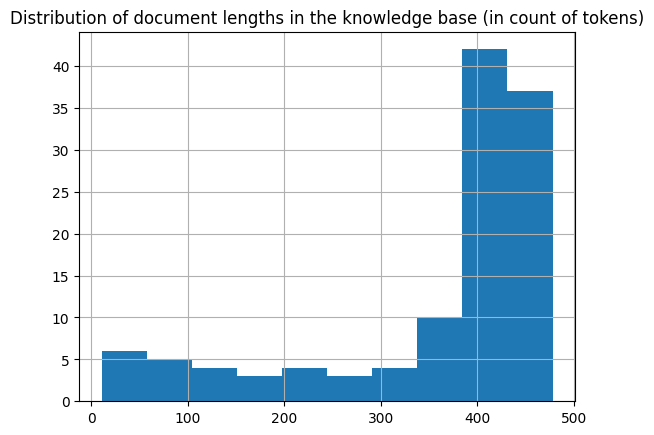

Embedding search results in a vector DB
Vector DB created


In [3]:
import time
start_time = time.time()
web_search_term = "iptacopan"
rag.init_knowledge_base(
      web_search_term = web_search_term,
      engine = "google",
      chunk_size = 512,
      )
end_time = time.time()

elapsed_time = end_time - start_time

In [4]:
start_time_q = time.time()
answer,source = rag.query(user_query = "Why do we use iptacopan",document_fetch_vectorstore = 5,document_fetch_similaritysearch = 1)
end_time_q = time.time()

elapsed_time_q = end_time_q - start_time_q


Embedding user query

Starting retrieval for user_query='Why do we use iptacopan'...
Genrating similar queries
['iptacopan clinical trials', 'iptacopan side effects', 'iptacopan mechanism of action', 'Why do we use iptacopan']

Compiling responce for user_query='Why do we use iptacopan'...
final_prompt_len:1839
model_max_length :1000000000000000019884624838656
Ploting for Explanability


In [5]:
answer

"We use iptacopan to treat a specific blood disorder called paroxysmal nocturnal hemoglobinuria (PNH), which causes the body's immune system to break down red blood cells, resulting in symptoms such as tiredness and shortness of breath, and eventually leading to anemia. Iptacopan helps to block the body's breakdown of red blood cells, lessening these symptoms and potentially reducing the need for blood transfusions. However, it should be noted that iptacopan can also lower the body's ability to fight infections, increasing the risk of serious and potentially fatal infections, especially meningitis and sepsis. Therefore, individuals taking iptacopan may require certain vaccinations as recommended by their healthcare provider."

In [6]:

start_time_q1 = time.time()
answer1,source1 = rag.query(user_query = "Whta is the market landscape for iptacopan",document_fetch_vectorstore = 5,document_fetch_similaritysearch = 1)
end_time_q1 = time.time()

elapsed_time_q1 = end_time_q - start_time_q

Embedding user query

Starting retrieval for user_query='Whta is the market landscape for iptacopan'...
Genrating similar queries
['Iptacopan clinical trials', 'Iptacopan competitors', 'Iptacopan market size and growth', 'Whta is the market landscape for iptacopan']

Compiling responce for user_query='Whta is the market landscape for iptacopan'...
final_prompt_len:2215
model_max_length :1000000000000000019884624838656
Ploting for Explanability


In [7]:
answer1

'The given context provides multiple extracts from reports titled "Iptacopan Market Size, Forecast, and Emerging Insight - 2032" that provide comprehensive insights about iptacopan for Atypical Hemolytic Uremic Syndrome (aHUS) in the 7MM (United States, EU4 [Germany, France, Italy, Spain], and the United Kingdom). These reports describe iptacopan\'s mechanism of action, dosage and administration, research and development activity, regulatory milestones, and future market assessments. Iptacopan, also known as LNP023, is a first-in-class, orally administered, small-molecule, potent, and highly selective factor B (FB) inhibitor, which prevents the formation of the alternative pathway (AP) C3-convertase (C3bBb) upon administration. The reports analyze the market landscape for iptacopan, providing an overview of the current state of the market, including competitive landscape, emerging therapies, and descriptive analyses such as SWOT and analyst views. Overall, these reports suggest that ip

In [8]:
start_time_q2 = time.time()
answer2,source2 = rag.query(user_query = "How is iptacopan better that its competitors",document_fetch_vectorstore = 5,document_fetch_similaritysearch = 1)
end_time_q2 = time.time()

elapsed_time_q2 = end_time_q - start_time_q

Embedding user query

Starting retrieval for user_query='How is iptacopan better that its competitors'...
Genrating similar queries
['iptacopan clinical trials and efficacy', 'iptacopan side effects and safety', 'iptacopan pricing and market access', 'How is iptacopan better that its competitors']

Compiling responce for user_query='How is iptacopan better that its competitors'...
final_prompt_len:2253
model_max_length :1000000000000000019884624838656
Ploting for Explanability


In [9]:
answer2


'According to the provided context, in a late-stage study comparing iptacopan, a treatment being developed by Novartis, to two rival drugs from AstraZeneca (Soliris and Ultomiris) in adults with paroxysmal nocturnal hemoglobinuria (PNH) who are experiencing anemia despite prior therapy, iptacopan demonstrated clinical meaningful superiority over anti-C5 treatment in both primary goals: increasing levels of hemoglobin, a crucial oxygen-carrying protein, in the absence of blood transfusions, and achieving "sustained" hemoglobin levels above a certain amount at six months. This information suggests that iptacopan is better than its competitors in terms of improving hemoglobin levels and reducing the need for blood transfusions in PNH patients.'

In [10]:
print(elapsed_time)
print(elapsed_time_q)
print(elapsed_time_q1)
print(elapsed_time_q2)

150.48175621032715
56.23310565948486
56.23310565948486
56.23310565948486


In [ ]:
##### Without GPU #####

In [2]:
!pip install -r /content/RAG/Test_RAG_ChatBot/requirments.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [3]:

import sys


sys.path.append("/content/RAG/Test_RAG_ChatBot/src")
sys.path.append("/content/RAG/Test_RAG_ChatBot/")

import config
from src import create_data_chunks , execute_rag , extract_data

import warnings
warnings.filterwarnings("ignore")

!playwright install

156.8 MiB [] 0% 0.0s156.8 MiB [] 0% 40.4s156.8 MiB [] 0% 25.8s156.8 MiB [] 0% 14.9s156.8 MiB [] 0% 9.2s156.8 MiB [] 1% 7.0s156.8 MiB [] 1% 6.3s156.8 MiB [] 2% 5.0s156.8 MiB [] 3% 4.3s156.8 MiB [] 4% 4.0s156.8 MiB [] 4% 3.7s156.8 MiB [] 5% 3.7s156.8 MiB [] 6% 3.5s156.8 MiB [] 7% 3.3s156.8 MiB [] 7% 3.4s156.8 MiB [] 8% 3.3s156.8 MiB [] 9% 2.9s156.8 MiB [] 10% 2.9s156.8 MiB [] 11% 2.7s156.8 MiB [] 12% 2.6s156.8 MiB [] 13% 2.5s156.8 MiB [] 14% 2.4s156.8 MiB [] 14% 2.5s156.8 MiB [] 16% 2.4s156.8 MiB [] 18% 2.1s156.8 MiB [] 20% 2.0s156.8 MiB [] 21% 1.9s156.8 MiB [] 22% 1.8s156.8 MiB [] 23% 1.8s156.8 MiB [] 24% 1.7s156.8 MiB [] 25% 1.7s156.8 MiB [] 27% 1.6s156.8 MiB [] 28% 1.6s156.8 MiB [] 29% 1.5s156.8 MiB [] 30% 1.5s156.8 MiB [] 31% 1.4s156.8 MiB [] 32% 1.4s156.8 MiB [] 34% 1.3s156.8 MiB [] 35% 1.3s156.8 MiB [] 36% 1.3s156.8 MiB [] 37% 1.3s156.8 MiB [] 38% 1.2s156.8 MiB [] 39% 1.2s156.8 MiB [] 41% 1.1s156.8 MiB [] 42% 1.1s156.8 MiB [] 43% 1.1s156.8 MiB [] 44% 1.1s156.8 MiB [] 45% 1.0s156.8 

In [5]:
rag = execute_rag(path = None,save_model_locally = False,gemini = False,pre_quantized = True)

Initilizing reader LLM as 'TheBloke/Llama-2-7B-GGUF'
Initilizing tokenizer as 'hf-internal-testing/llama-tokenizer'


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Reader LLM initilization complet


Creating Knowledge base
Genrating web queries

Searching google for Iptacopan clinical trials
Searching google for Iptacopan market analysis


Searching google for Iptacopan vs competitors
Searching google for iptacopan


Data Fetch completed for iptacopan

Data Fetch completed for Iptacopan market analysis

Data Fetch completed for Iptacopan vs competitors

Data Fetch completed for Iptacopan clinical trials
Processing search results
Model's maximum sequence length: 512
Chunks's maximum sequence length: 478


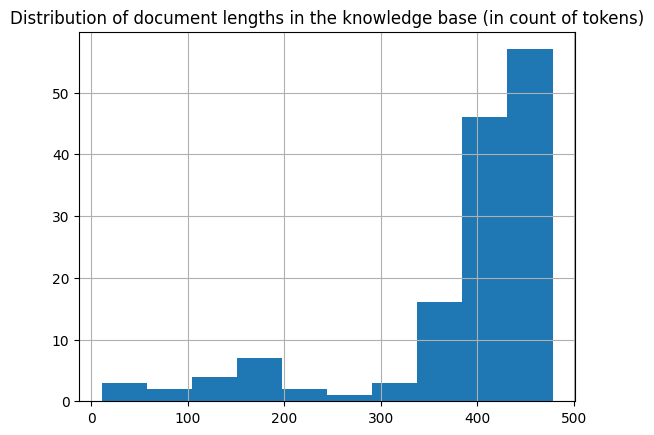

Embedding search results in a vector DB
Vector DB created


In [7]:
import time
start_time = time.time()
web_search_term = "iptacopan"
rag.init_knowledge_base(
      web_search_term = web_search_term,
      engine = "google",
      chunk_size = 512,
      )
end_time = time.time()

elapsed_time = end_time - start_time

In [8]:
start_time_q = time.time()
answer,source,raw_output = rag.query(user_query = "Why do we use iptacopan",document_fetch_vectorstore = 5,document_fetch_similaritysearch = 1)
end_time_q = time.time()

elapsed_time_q = end_time_q - start_time_q
# 1:57: 30 min
#2:36 :


Embedding user query

Starting retrieval for user_query='Why do we use iptacopan'...
Genrating similar queries
['Iptacopan clinical trials', 'Iptacopan mechanism of action', 'Iptacopan drug interactions', 'Why do we use iptacopan']


No chat template is set for this tokenizer, falling back to a default class-level template. This is very error-prone, because models are often trained with templates different from the class default! Default chat templates are a legacy feature and will be removed in Transformers v4.43, at which point any code depending on them will stop working. We recommend setting a valid chat template before then to ensure that this model continues working without issues.



Compiling responce for user_query='Why do we use iptacopan'...
final_prompt_len:2094
model_max_length :3000
Ploting for Explanability


In [9]:
answer

'?\n\nAnswer:\nIptacopan is used to treat a type of blood disease called paroxysmal nocturnal hemoglobinuria (PNH). This medicine helps reduce red blood cell destruction or breakdown (hemolysis) in patients with PNH. This medicine is available only under a restricted distribution program called Fabhalta® REMS (Risk Evaluation and Mitigation Strategy) Program.\n\n\n\n'

In [10]:
elapsed_time_q

981.9524438381195

In [12]:

start_time_q1 = time.time()
answer1,source1,raw_output1 = rag.query(user_query = "Whta is the market landscape for iptacopan",document_fetch_vectorstore = 5,document_fetch_similaritysearch = 1)
end_time_q1 = time.time()

elapsed_time_q1 = end_time_q - start_time_q

Embedding user query

Starting retrieval for user_query='Whta is the market landscape for iptacopan'...
Genrating similar queries
['Iptacopan clinical trials', 'Iptacopan competitors', 'Iptacopan market size and growth', 'Whta is the market landscape for iptacopan']

Compiling responce for user_query='Whta is the market landscape for iptacopan'...
final_prompt_len:398
model_max_length :3000
Ploting for Explanability


In [13]:
answer1

'?\n\nAnswer:\nThe global iptacopan market size was valued at USD 95 million in 2021 and is expected to reach USD 178 million by 2032, growing at a CAGR of 6.4% during the forecast period (2022–2032).\n\nThe global iptacopan market is driven by various factors such as increasing prevalence of cancer and rising geriatric population. According to the World Health Organization (WHO), there were around 19.3 million new cases of cancer diagnosed globally in 2020. The geriatric population is also increasing due to the increasing life expectancy rate across the globe. According to the United Nations Department of Economic and Social Affairs, the global life expectancy increased from 64 years in 1990 to 73 years in 2019. This increase in the geriatric population is driving the demand for iptacopan.\n\nHowever, the high cost associated with the treatment may hinder the growth of this market.\n\nGet Free Report Sample PDF and Other Important Reports on Iptacopan Market @ https://www.futurewisere

In [14]:
elapsed_time_q1

981.9524438381195

In [15]:
start_time_q2 = time.time()
answer2,source2,raw_output2 = rag.query(user_query = "How is iptacopan better that its competitors",document_fetch_vectorstore = 5,document_fetch_similaritysearch = 1)
end_time_q2 = time.time()

elapsed_time_q2 = end_time_q - start_time_q

Embedding user query

Starting retrieval for user_query='How is iptacopan better that its competitors'...
Genrating similar queries
['iptacopan clinical trials', 'iptacopan safety and efficacy', 'iptacopan market share and competition', 'How is iptacopan better that its competitors']

Compiling responce for user_query='How is iptacopan better that its competitors'...
final_prompt_len:2297
model_max_length :3000
Ploting for Explanability


In [18]:
answer2

'?\nAnswer: Iptacopan is better than its competitors because it is more effective than its competitors.\nIptacopan is better than its competitors because it is more effective than its competitors.\n\n'

In [16]:
elapsed_time_q2

981.9524438381195